### Pandas Dataframes Exercises

For several of the following exercises, you'll need to load several datasets using the pydataset library. (If you get an error when trying to run the import below, use pip to install the pydataset package.)

In [1]:
from pydataset import data
import pandas as pd

initiated datasets repo at: /Users/danielguerrero/.pydataset/


When the instructions say to load a dataset, you can pass the name of the dataset as a string to the data function to load the dataset. You can also view the documentation for the data set by passing the show_doc keyword argument.

**1. Copy the code from the lesson to create a dataframe**

In [2]:
import pandas as pd
import numpy as np

np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades})

type(df)

pandas.core.frame.DataFrame

Sort the english grades by the passing_english column. How are duplicates handled?

In [5]:
english_grades = df.assign(passing_english=df.english > 70)

In [6]:
english_grades.sort_values(by="english")

,name,math,english,reading,passing_english
8,Albert,92,62,87,False
11,Alan,92,62,72,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
2,Suzie,94,74,95,True
5,John,79,76,93,True
1,Jane,88,79,67,True
9,Richard,69,80,94,True
0,Sally,62,85,80,True
4,Ada,77,92,98,True


Sort the english grades first by passing_english and then by student name. All the students that are failing english should be first, and within the students that are failing english they should be ordered alphabetically. The same should be true for the students passing english. (Hint: you can pass a list to the .sort_values method)

In [9]:
english_grades.sort_values(by=["passing_english", "name"])

,name,math,english,reading,passing_english
11,Alan,92,62,72,False
8,Albert,92,62,87,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
4,Ada,77,92,98,True
3,Billy,98,96,88,True
10,Isaac,92,99,93,True
1,Jane,88,79,67,True
5,John,79,76,93,True
9,Richard,69,80,94,True


Sort the english grades first by passing_english, and then by the actual english grade, similar to how we did in the last step.

In [12]:
english_grades.sort_values(by=["passing_english", "english"])

,name,math,english,reading,passing_english
8,Albert,92,62,87,False
11,Alan,92,62,72,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
2,Suzie,94,74,95,True
5,John,79,76,93,True
1,Jane,88,79,67,True
9,Richard,69,80,94,True
0,Sally,62,85,80,True
4,Ada,77,92,98,True


Calculate each students overall grade and add it as a column on the dataframe. The overall grade is the average of the math, english, and reading grades.

In [179]:
english_grades["overall_grade"] = ((english_grades.math + english_grades.english + english_grades.reading)/ 3).astype(int)

In [180]:
english_grades

,name,math,english,reading,passing_english,overall_grade
0,Sally,62,85,80,True,75
1,Jane,88,79,67,True,78
2,Suzie,94,74,95,True,87
3,Billy,98,96,88,True,94
4,Ada,77,92,98,True,89
5,John,79,76,93,True,82
6,Thomas,82,64,81,False,75
7,Marie,93,63,90,False,82
8,Albert,92,62,87,False,80
9,Richard,69,80,94,True,81


## Exercises 2:

Load the mpg dataset. Read the documentation for the dataset and use it for the following questions:

In [181]:
# Check out all of the datasets you can pull in from pydataset!

df = pd.DataFrame(data())
df

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [19]:
mpg = data('mpg')

In [20]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


How many rows and columns are there?

In [26]:
len(mpg.columns)

11

What are the data types of each column?

Summarize the dataframe with .info and .describe

In [29]:
mpg.info(), mpg.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


(None,             displ         year         cyl         cty         hwy
 count  234.000000   234.000000  234.000000  234.000000  234.000000
 mean     3.471795  2003.500000    5.888889   16.858974   23.440171
 std      1.291959     4.509646    1.611534    4.255946    5.954643
 min      1.600000  1999.000000    4.000000    9.000000   12.000000
 25%      2.400000  1999.000000    4.000000   14.000000   18.000000
 50%      3.300000  2003.500000    6.000000   17.000000   24.000000
 75%      4.600000  2008.000000    8.000000   19.000000   27.000000
 max      7.000000  2008.000000    8.000000   35.000000   44.000000)

Rename the cty column to city.

In [30]:
mpg.rename(columns={"cty": "city"})

,manufacturer,model,displ,year,cyl,trans,drv,city,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Rename the hwy column to highway.

In [32]:
mpg.rename(columns={'hwy': "highway"})

,manufacturer,model,displ,year,cyl,trans,drv,cty,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Do any cars have better city mileage than highway mileage?

In [36]:
mpg["greater_city_mpg"] = mpg.cty > mpg.hwy

In [56]:
mpg.greater_city_mpg.value_counts()

False    234
Name: greater_city_mpg, dtype: int64

Create a column named mileage_difference this column should contain the difference between highway and city mileage for each car.

In [57]:
mpg["mileage_difference"] = mpg.hwy - mpg.cty

In [58]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,greater_city_mpg,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,False,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,False,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,False,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,False,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,False,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,False,8


Which car (or cars) has the highest mileage difference?

In [152]:
mpg.nlargest(1,'mileage_difference', keep='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,greater_city_mpg,mileage_difference,average_mileage
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,False,12,30.0
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,False,12,35.0


Which compact class car has the lowest highway mileage? The best?

In [183]:
mpg["class"].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [65]:
compact_cars = mpg["class"] == "compact"

In [185]:
mpg[compact_cars].nlargest(1,"hwy", keep = "all")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,greater_city_mpg,mileage_difference,average_mileage
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,False,11,38.5


In [154]:
mpg[compact_cars].nsmallest(1,"hwy",keep="all")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,greater_city_mpg,mileage_difference,average_mileage
220,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact,False,7,19.5


Create a column named average_mileage that is the mean of the city and highway mileage.

In [86]:
mpg["average_mileage"] = (mpg.hwy + mpg.cty) / 2

In [87]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,greater_city_mpg,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,False,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,False,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,False,10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,False,9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,False,8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,False,10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,False,8,22.0


Which dodge car has the best average mileage? The worst?

In [89]:
dodge_cars = mpg.manufacturer == 'dodge'

In [155]:
mpg[dodge_cars].nlargest(1,'average_mileage',keep="all")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,greater_city_mpg,mileage_difference,average_mileage
38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,False,6,21.0


In [175]:
mpg[dodge_cars].nsmallest(1,'average_mileage', keep='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,greater_city_mpg,mileage_difference,average_mileage
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,False,3,10.5
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,False,3,10.5
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,False,3,10.5
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,False,3,10.5


## Exercises 3

Load the Mammals dataset. Read the documentation for it, and use the data to answer these questions:

In [133]:
mammals = data('Mammals')

How many rows and columns are there?

In [134]:
mammals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 1 to 107
Data columns (total 4 columns):
weight      107 non-null float64
speed       107 non-null float64
hoppers     107 non-null bool
specials    107 non-null bool
dtypes: bool(2), float64(2)
memory usage: 2.7 KB


What are the data types?

In [98]:
mammals.describe()

,weight,speed
count,107.000000,107.000000
mean,278.688178,46.208411
std,839.608269,26.716778
min,0.016000,1.600000
25%,1.700000,22.500000
50%,34.000000,48.000000
75%,142.500000,65.000000
max,6000.000000,110.000000


## Optional Visualization

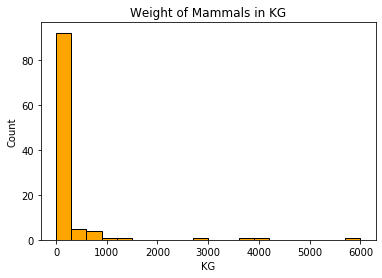

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(mammals.weight, bins=20, color='orange', edgecolor='black')
plt.title('Weight of Mammals in KG')
plt.xlabel('KG')
plt.ylabel('Count')

plt.show()

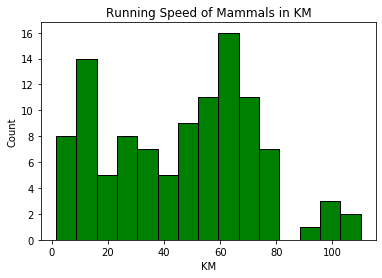

In [178]:
plt.hist(mammals.speed, bins=15, color='green', edgecolor='black')
plt.title('Running Speed of Mammals in KM')
plt.xlabel('KM')
plt.ylabel('Count')

plt.show()

What is the the weight of the fastest animal?

In [137]:
mammals[mammals["speed"]==mammals["speed"].max()]

,weight,speed,hoppers,specials
53,55.0,110.0,False,False


What is the overal percentage of specials?

In [119]:
special_mammals = mammals["specials"] == True

In [125]:
special_mammals.value_counts()

False    97
True     10
Name: specials, dtype: int64

In [186]:
overall_percentage = (10 / 107) * 100

print(f"The overall special percentage is {round(overall_percentage,2)}%")

The overall special percentage is 9.35%


How many animals are hoppers that are above the median speed? What percentage is this?

In [189]:
hoppers = mammals["hoppers"] == True

hoppers.sum()

11

In [112]:
fast_animals = mammals["speed"] > mammals["speed"].mean()

In [159]:
fast_hoppers = len(mammals[hoppers & fast_animals])

In [171]:
percentage_fast = (fast_hoppers / len(mammals)) * 100

print(f"The percentage of hopper animals that have a higher than average speed is {round(percentage_fast, 2)}%")

The percentage of hopper animals that have a higher than average speed is 6.54%


In [190]:
percentage_fast_hoppers = (fast_hoppers / hoppers.sum()) * 100

In [193]:
percentage_fast_hoppers

print(f"The percentage of hopper animals that have a higher than average speed out of the hoppers is {round(percentage_fast_hoppers,1)}%")

The percentage of hopper animals that have a higher than average speed out of the hoppers is 63.6%
